# Analyse de l'écosystème de diffusion de jeux sur Twitch

> *Tendances, statistiques des jeux streamés et hypothèses exploratoires*
>
> **Auteurs**: *Ugo Courche*, *Hadrien Belleville*
>
> **Date**: *15/03/2024*

## Table des matières 

1. [Introduction](#introduction)
1. [Influence des pics de spectateurs sur la popularité générale d'un jeu](#influence-des-pics-de-spectateurs-sur-la-popularité-générale-dun-jeu)
    1. [Exploitation de ces données](#exploitation-de-ces-données)
        1. [Impact de la saisonnalité pour League of Legends](#impact-de-la-saisonnalité-pour-league-of-legends)
        1. [Impact du renouvellement de contenu pour GTA V](#impact-du-renouvellement-de-contenu-pour-gta-v)
1. [Conclusion](#conclusion)

## Introduction

Cette analyse de l'écosystème de diffusion de jeux sur Twitch est réalisée dans le but de comprendre quelles actions peuvent être mise en place par un studio de jeu pour aider à populariser son jeu via des plateformes de streams. Ces données sont analysées pour donner des pistes lors du développement d'un jeu ainsi qu'un conseil des lignes directrices à prendre pour la continuité de la vie du jeu.

La première étape consiste à organiser l'environnement d'analyse en important pandas et le jeux de données.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_1531/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("Twitch_game_data.csv")
df.head(5)

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


Ensuite, nous regardons les types d'objets que nous allons manipuler.

In [3]:
df.dtypes

Rank                  int64
Game                 object
Month                 int64
Year                  int64
Hours_watched         int64
Hours_streamed        int64
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
dtype: object

On remarque que les colonnes **'Month'** et **'Year'** sont des `int64`. Cela ne posera pas de problème lorsqu'il faudra manipuler uniquement des mois ou des années. Nonobstant il pourrait être intéressant d'avoir une colonne de type `datetime` que nous pourrions utiliser en ayant l'information de l'année et du mois pour ainsi observer des évolutions au mois près durant plusieurs années.

C'est ce que nous faisons dans le bloc suivant où on ajoute une colonne **'Date'** au dataframe en spécifiant le format `'AAAA-MM'` et en ne gardant que la période au mois près (on ne s'occupe pas des jours).

Cette colonne contiendra donc des informations de type `period[M]`, depuis lequel nous pourrons retrouver le format `datetime64` en ajoutant, lorsque nécessaire, l'appel à la fonction `dt.to_timestamp()` sur la colonne **'Date'**.

In [4]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str), format='%Y%m').dt.to_period('M')
df[["Game", "Month", "Year", "Date"]].head(3)

,Game,Month,Year,Date
0,League of Legends,1,2016,2016-01
1,Counter-Strike: Global Offensive,1,2016,2016-01
2,Dota 2,1,2016,2016-01


## Influence des pics de spectateurs sur la popularité générale d'un jeu

> **Hypothèse**: Les jeux qui génèrent des pics de spectateurs élevés sont plus susceptibles d'attirer de nouveaux joueurs et de maintenir une base de fans active.

Pour tester l'hypothèse de l'influence des pics de spectateurs sur la popularité générale d'un jeu il faut réussir à mettre en évidence pour un echantillon de jeux si les pics de spectateurs ont une influence sur l'évolution de la popularité des jeux.

Prenons l'exemple de 4 jeux, avec League of Legends, Dota 2, SMITE et Heroes of the Storm. Ces jeux sont 4 MOBA (Multiplayer Online Battle Arena) ayant des communautés très distinctes et des renommées bien différentes.

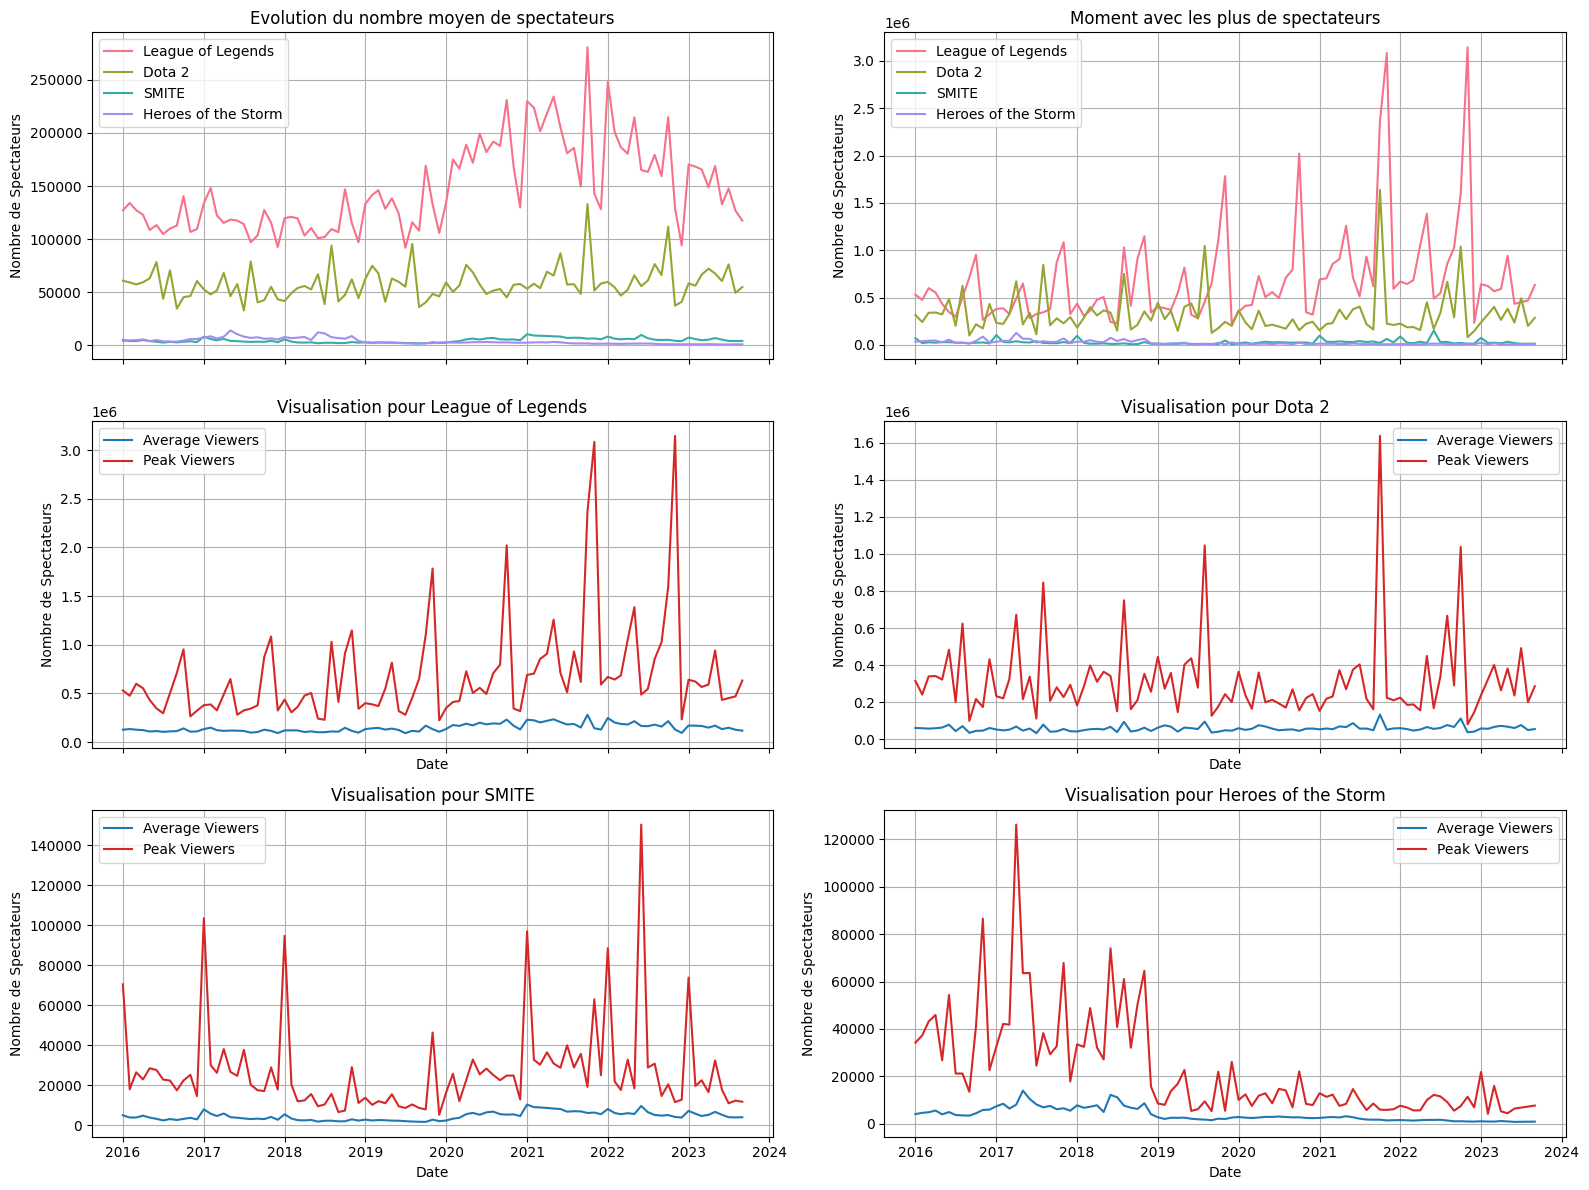

In [5]:
selected_games = ['League of Legends', 'Dota 2', 'SMITE', 'Heroes of the Storm']
selected_data = df[df['Game'].isin(selected_games)]

selected_data = selected_data.sort_values('Date')
selected_data['Date'] = selected_data['Date'].dt.to_timestamp()

fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharex=True)

axes = axes.flatten()

# Tracé 1 : Evolution du nombre moyen de spectateurs
sns.lineplot(data=selected_data, x='Date', y='Avg_viewers', hue='Game', palette='husl', ax=axes[0])
axes[0].set_title('Evolution du nombre moyen de spectateurs')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Nombre de Spectateurs')
axes[0].legend()
axes[0].grid(True)

# Tracé 2 : Moment avec les plus de spectateurs
sns.lineplot(data=selected_data, x='Date', y='Peak_viewers', hue='Game', palette='husl', ax=axes[1])
axes[1].set_title('Moment avec les plus de spectateurs')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Nombre de Spectateurs')
axes[1].legend()
axes[1].grid(True)

for i, games in enumerate(selected_games):
    lol_data = selected_data[selected_data['Game']==games]
    axes[i+2].plot(lol_data['Date'], lol_data['Avg_viewers'], linestyle='-', label='Average Viewers', color='tab:blue')
    axes[i+2].plot(lol_data['Date'], lol_data['Peak_viewers'], linestyle='-', label='Peak Viewers', color='tab:red')
    axes[i+2].set_title(f'Visualisation pour ' + games)
    axes[i+2].set_xlabel('Date')
    axes[i+2].set_ylabel('Nombre de Spectateurs')
    axes[i+2].legend()
    axes[i+2].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()


Pour ces jeux, le pic de spectateur n'a pas l'air d'avoir une grande influence sur l'évolution des moyennes de spectateurs. Cependant on remarque que les pics de spectateurs augmentent significativement la moyenne de spectateurs lors du mois courant. 

Il faut aussi prendre en considération le fait que ces jeux sont des jeux en lignes. Nous faisons la même visulation pour 4 jeux qui sont des jeux solos pour voir s'il y a des courbes différentes.

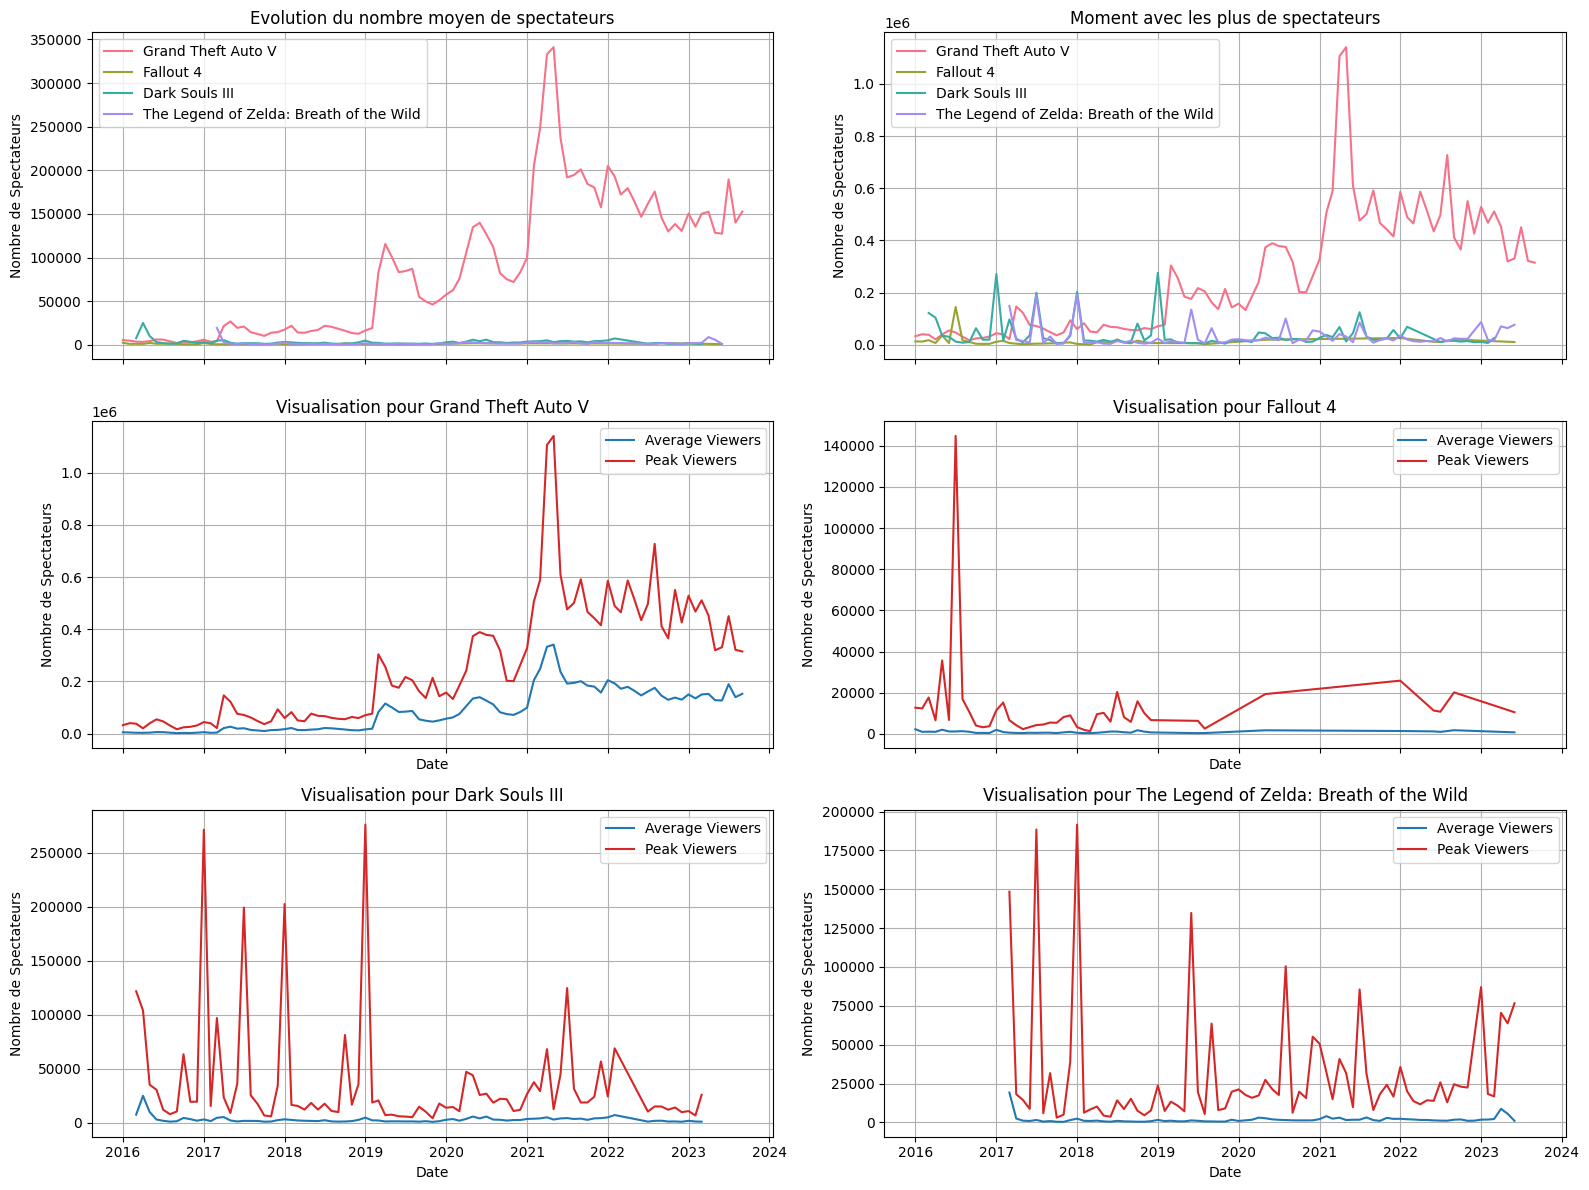

In [6]:
selected_games_new = ['Grand Theft Auto V', 'Fallout 4', 'Dark Souls III', 'The Legend of Zelda: Breath of the Wild']
selected_data_new = df[df['Game'].isin(selected_games_new)]

selected_data_new = selected_data_new.sort_values('Date')
selected_data_new['Date'] = selected_data_new['Date'].dt.to_timestamp()

fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharex=True)

axes = axes.flatten()

# Tracé 1 : Evolution du nombre moyen de spectateurs
sns.lineplot(data=selected_data_new, x='Date', y='Avg_viewers', hue='Game', palette='husl', ax=axes[0])
axes[0].set_title('Evolution du nombre moyen de spectateurs')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Nombre de Spectateurs')
axes[0].legend()
axes[0].grid(True)

# Tracé 2 : Moment avec les plus de spectateurs
sns.lineplot(data=selected_data_new, x='Date', y='Peak_viewers', hue='Game', palette='husl', ax=axes[1])
axes[1].set_title('Moment avec les plus de spectateurs')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Nombre de Spectateurs')
axes[1].legend()
axes[1].grid(True)

for i, games in enumerate(selected_games_new):
    game_data = selected_data_new[selected_data_new['Game'] == games]
    axes[i+2].plot(game_data['Date'], game_data['Avg_viewers'], linestyle='-', label='Average Viewers', color='tab:blue')
    axes[i+2].plot(game_data['Date'], game_data['Peak_viewers'], linestyle='-', label='Peak Viewers', color='tab:red')
    axes[i+2].set_title(f'Visualisation pour ' + games)
    axes[i+2].set_xlabel('Date')
    axes[i+2].set_ylabel('Nombre de Spectateurs')
    axes[i+2].legend()
    axes[i+2].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

Pour ces jeux on ne peut pas réellement remarquer de patterns communs. On voit que pour GTA V, les courbes des peaks et average viewers ont tendance à se suivrent.

### Exploitation de ces données

De ces tableaux ressortent deux tendances qui influent sur les pics de spectateurs et donc sur la popularité générale d'un jeu. 

+ La saisonnalité d'un jeu (passe de combats, événements e-sportifs, etc...)
+ Le renouvellement de contenu (DLC, suite de licence, grosse mise a jour, etc...)

Pour le mettre en évidence, nous nous appuyons sur deux jeux qui marquent fortement ces tendances: 

+ League of Legends pour la saisonnalité
+ GTA V pour le renouvellement de contenu

#### Impact de la saisonnalité pour League of Legends

/tmp/ipykernel_1531/256120692.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=lol_data, x='Date', y='Avg_viewers', palette='husl', ax=axes[0])
/tmp/ipykernel_1531/256120692.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=lol_data, x='Date', y='Peak_viewers', palette='husl', ax=axes[1])


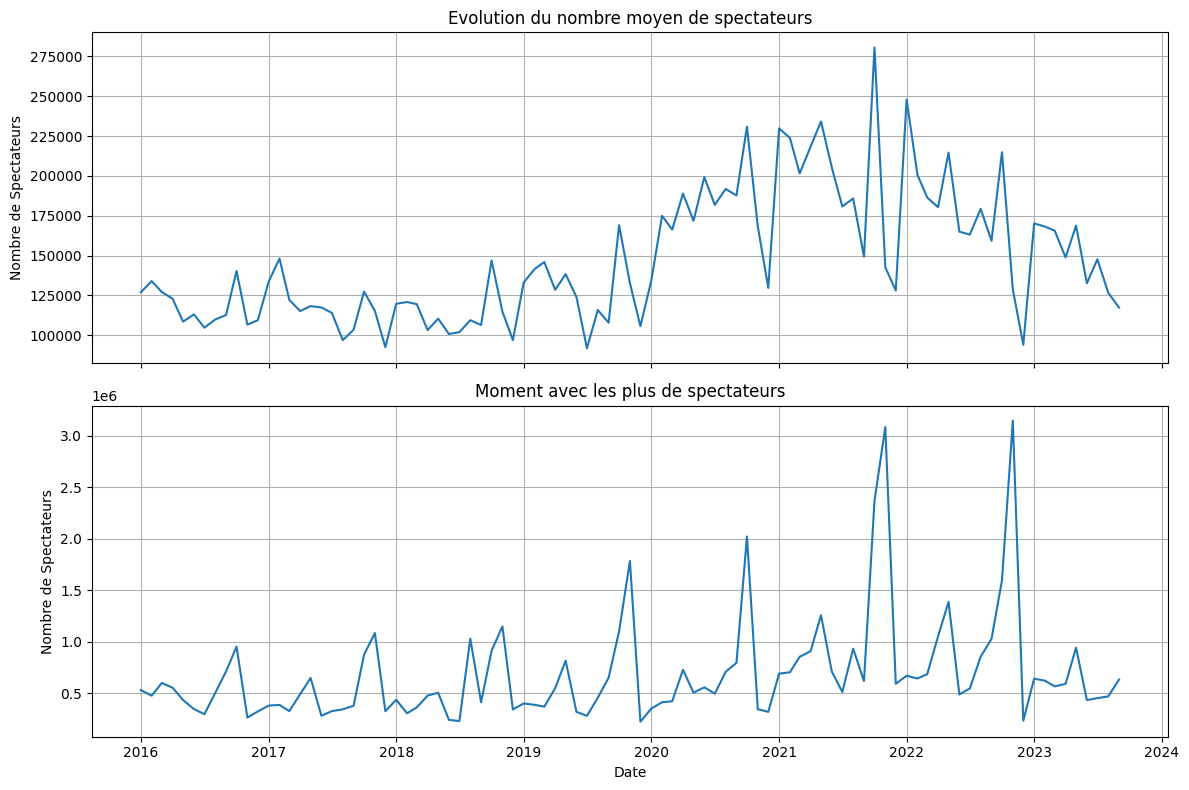

In [7]:
# Filtrer les données uniquement pour League of Legends
lol_data = df[df['Game'] == 'League of Legends']
lol_data = lol_data.sort_values('Date')
lol_data['Date'] = lol_data['Date'].dt.to_timestamp()

# Création de la figure avec deux graphes
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Tracé 1 : Evolution du nombre moyen de spectateurs
sns.lineplot(data=lol_data, x='Date', y='Avg_viewers', palette='husl', ax=axes[0])
axes[0].set_title('Evolution du nombre moyen de spectateurs')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Nombre de Spectateurs')
axes[0].grid(True)

# Tracé 2 : Moment avec les plus de spectateurs
sns.lineplot(data=lol_data, x='Date', y='Peak_viewers', palette='husl', ax=axes[1])
axes[1].set_title('Moment avec les plus de spectateurs')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Nombre de Spectateurs')
axes[1].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()


On remarque des pics de spectateurs réguliers autour de la fin d'année. Pour un peu plus de précision regardons l'évolution sur l'année 2022.

/tmp/ipykernel_1531/3505650184.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=lol_data, x='Date', y='Avg_viewers', palette='husl', ax=axes[0])
/tmp/ipykernel_1531/3505650184.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=lol_data, x='Date', y='Peak_viewers', palette='husl', ax=axes[1])


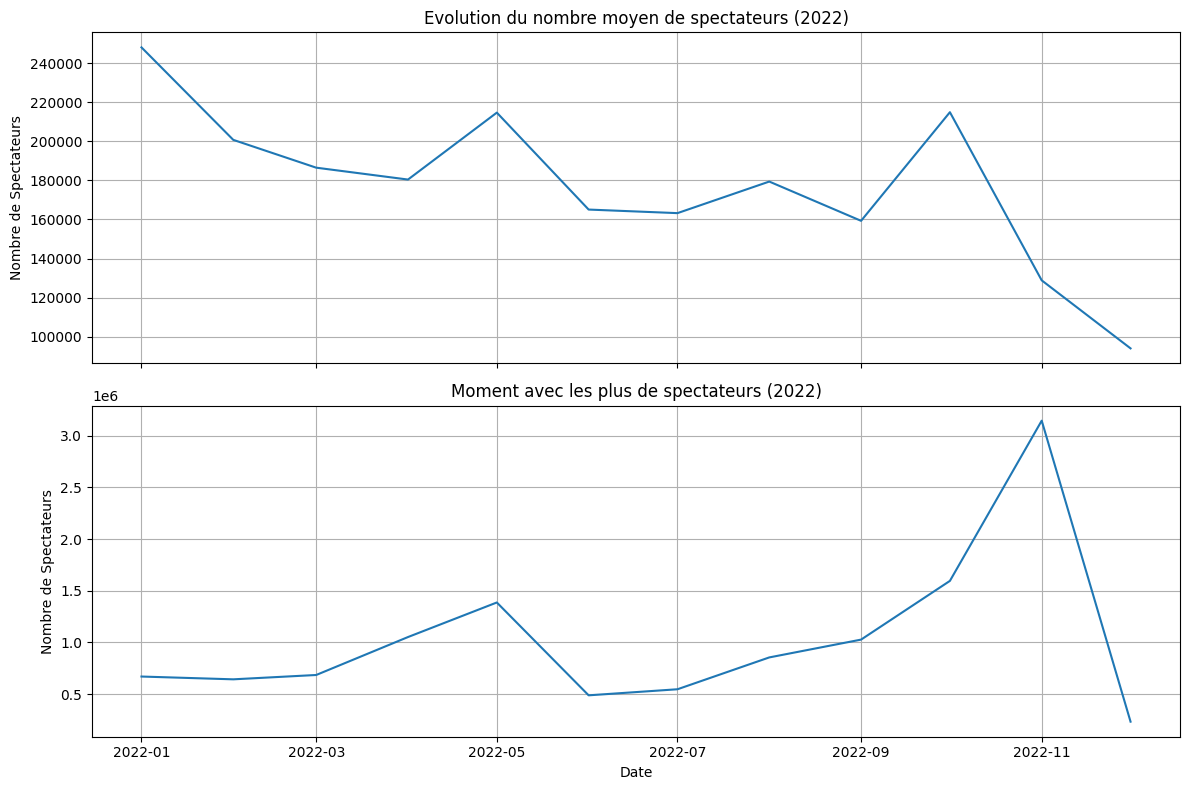

In [8]:
# Assurez-vous que les dates sont au format timestamp
df['Date'] = df['Date'].dt.to_timestamp()

# Filtrer les données uniquement pour League of Legends et pour l'année 2022
lol_data = df[(df['Game'] == 'League of Legends') & (df['Date'].dt.year == 2022)]
lol_data = lol_data.sort_values('Date')

# Création de la figure avec deux graphes
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Tracé 1 : Evolution du nombre moyen de spectateurs
sns.lineplot(data=lol_data, x='Date', y='Avg_viewers', palette='husl', ax=axes[0])
axes[0].set_title('Evolution du nombre moyen de spectateurs (2022)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Nombre de Spectateurs')
axes[0].grid(True)

# Tracé 2 : Moment avec les plus de spectateurs
sns.lineplot(data=lol_data, x='Date', y='Peak_viewers', palette='husl', ax=axes[1])
axes[1].set_title('Moment avec les plus de spectateurs (2022)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Nombre de Spectateurs')
axes[1].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()


Sur le site de Riot Games **[lolesports.com](https://lolesports.com/article/league-of-legends-worlds-2022-dates-and-seeding/blt030c8a08a910c7f5)** on retrouve les dates de la coupe du monde. Celle-ci commence fin septembre, avec la finale début novembre. Ces dates correspondent parfaitement au début de l'augmentation du nombre de spectateurs ainsi qu'au nombre maximum.

Novembre est aussi la fin de la saison classée ce qui marque chaque année un gros changement et donc est également un élément de saisonnalité du jeu qui a une influence sur la popularité du jeu. Les début de saisons étant en début d'année, le 5 janvier 2022 pour la saison 12, cela influe sur la moyenne de spectateurs. 

En regardant le premier graphique on remarque que la moyenne des spectateurs est au plus haut lors du début d'anneé et donc au moment de la sortie de la nouvelle saison. 

Cela est dû au fait que la nouvelle saison apporte traditionnellement beaucoup de changements et les joueurs aiment s'informer.

#### Impact du renouvellement de contenu pour GTA V

> *Toutes les dates de sorties des DLC et mise à jour sont disponnible via ce lien: https://rockstaractu.com/jeux/gta-online/mises-a-jour/*

/tmp/ipykernel_1531/443550860.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=gta_data, x='Date', y='Avg_viewers', palette='husl', ax=axes[0])
/tmp/ipykernel_1531/443550860.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=gta_data, x='Date', y='Peak_viewers', palette='husl', ax=axes[1])


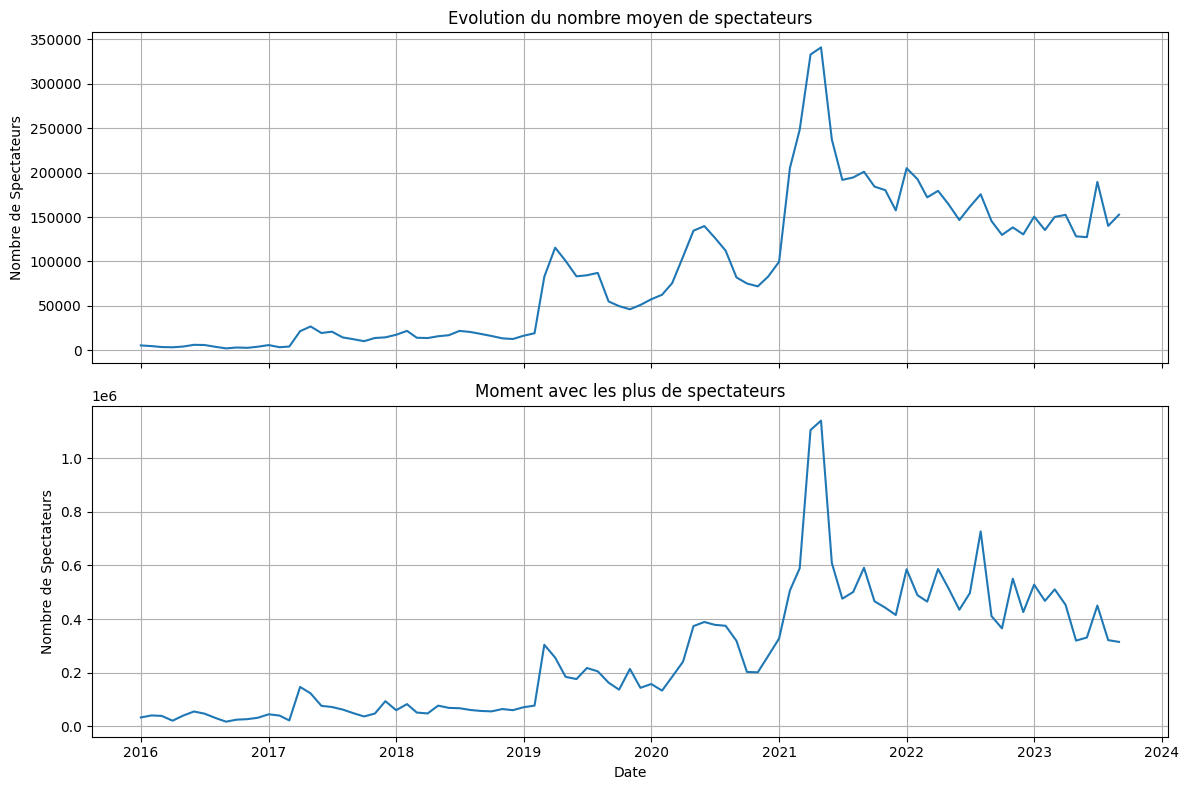

In [9]:
# Filtrer les données uniquement pour GTA V
gta_data = df[df['Game'] == 'Grand Theft Auto V']
gta_data = gta_data.sort_values('Date')

# Création de la figure avec deux graphes
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Tracé 1 : Evolution du nombre moyen de spectateurs
sns.lineplot(data=gta_data, x='Date', y='Avg_viewers', palette='husl', ax=axes[0])
axes[0].set_title('Evolution du nombre moyen de spectateurs')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Nombre de Spectateurs')
axes[0].grid(True)

# Tracé 2 : Moment avec les plus de spectateurs
sns.lineplot(data=gta_data, x='Date', y='Peak_viewers', palette='husl', ax=axes[1])
axes[1].set_title('Moment avec les plus de spectateurs')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Nombre de Spectateurs')
axes[1].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()


On observe un pic de spectateurs entre 2022 et 2023. Pour un peu plus de précision regardons l'évolution à cette période.

/tmp/ipykernel_1531/3359119746.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=gta_data, x='Date', y='Avg_viewers', palette='husl', ax=axes[0])
/tmp/ipykernel_1531/3359119746.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=gta_data, x='Date', y='Peak_viewers', palette='husl', ax=axes[1])


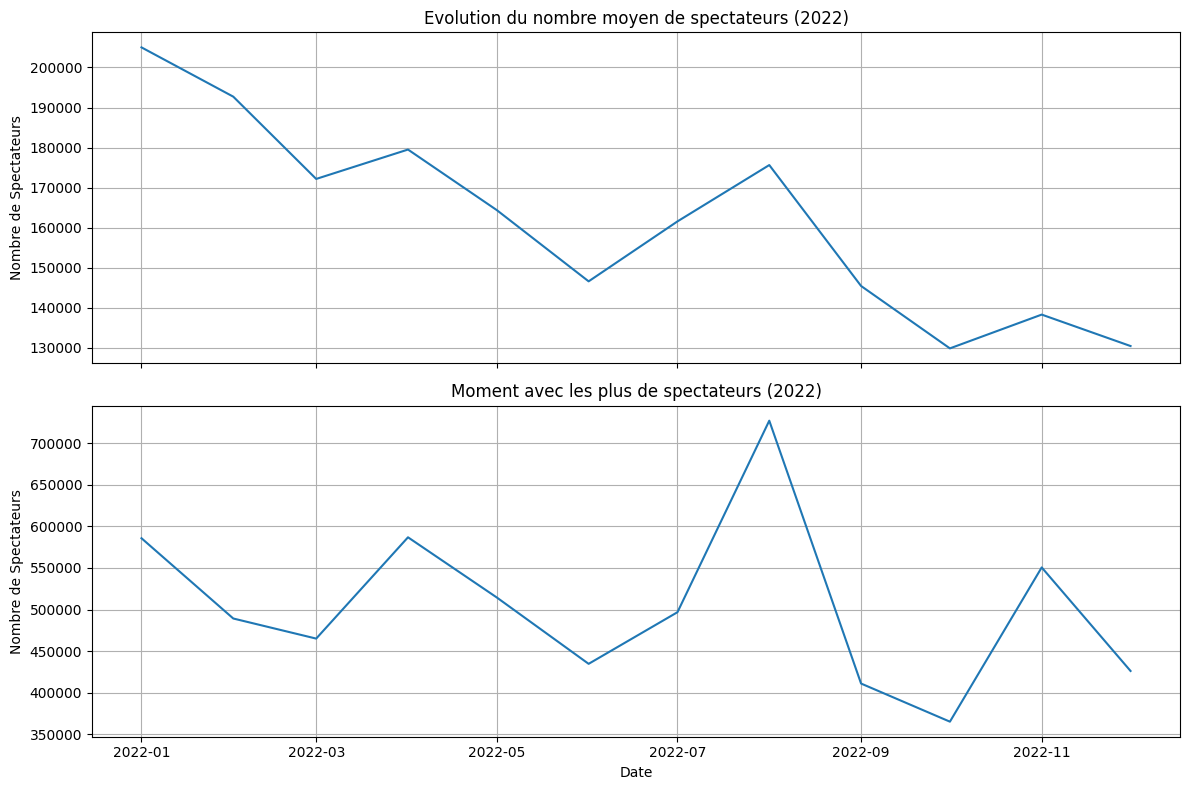

In [10]:
# Filtrer les données uniquement pour League of Legends et pour l'année 2022
gta_data = df[(df['Game'] == 'Grand Theft Auto V') & (df['Date'].dt.year == 2022)]
gta_data = gta_data.sort_values('Date')

# Création de la figure avec deux graphes
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Tracé 1 : Evolution du nombre moyen de spectateurs
sns.lineplot(data=gta_data, x='Date', y='Avg_viewers', palette='husl', ax=axes[0])
axes[0].set_title('Evolution du nombre moyen de spectateurs (2022)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Nombre de Spectateurs')
axes[0].grid(True)

# Tracé 2 : Moment avec les plus de spectateurs
sns.lineplot(data=gta_data, x='Date', y='Peak_viewers', palette='husl', ax=axes[1])
axes[1].set_title('Moment avec les plus de spectateurs (2022)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Nombre de Spectateurs')
axes[1].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()


Sur le site de Rockstar **[rockstaractu.com]( https://rockstaractu.com/jeux/gta-online/mises-a-jour/)** on retrouve les dates de sorties des DLC. 
On observe sur ce site qu'en 2022, un DLC est sortie le 26 juillet 2022 et cette date correspond parfaitement au début de l'augmentation du nombre de spectateurs ainsi qu'au nombre maximum.

De manière générale, un nouveau DLC est disponible chaque année en été (Juillet/Aout) et en hiver (Décembre).En regardant le premier graphique on remarque que la moyenne des spectateurs est au plus haut lors de ces périodes de sortis de DLC. 

Cela est dû au fait que du nouveau contenu est disponible sur le jeu, à ces moments là ce qui apporte beaucoup de changements, les joueurs et streamers ont donc un intérêt à retourner sur le jeu.

## Conclusion

Via l'analyse de la saisonnalité avec League of Legends et l'analyse du renouvellement de contenu via GTA V on remarque que pour maintenir l'attrait d'un jeu sur Twitch il est important de donner aux joueurs ainsi qu'aux streamers une raison de s'intéresser au jeu. Que ce soit un jeu en ligne ou en solo, cet élément du renouvellement est important à prendre en considération. Ainsi le jeu reste attrayant aux yeux des joueurs et spectateurs et ceux qui avaient arrêté de jouer pourraient ainsi avoir envie de revenir.

C'est ce renouvellement qui va également faire en sorte que les créateurs de contenu sur Twitch vont retourner streamer le jeu en question pour explorer les nouveaux contenu. Ceci permettra de ramener des nouveaux joueurs via ces streamers qui impact une communauté que les studios de jeux n'ont pas forcément à disposition. La partie importante à retenir de cette analyse reste [l'analyse des données](#exploitation-de-ces-données) qui montrent directement l'impact de ces deux facteurs sur la popularité d'un jeu sur Twitch.